In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


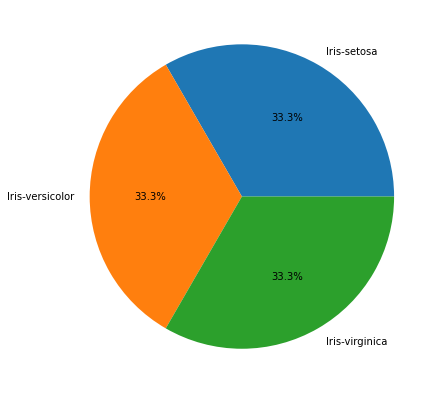

In [3]:
labels =pd.unique(df.species)
size=df.species.value_counts()

fig = plt.figure(figsize =(10, 7))
plt.pie(size, labels = labels , autopct='%1.1f%%')

plt.show()

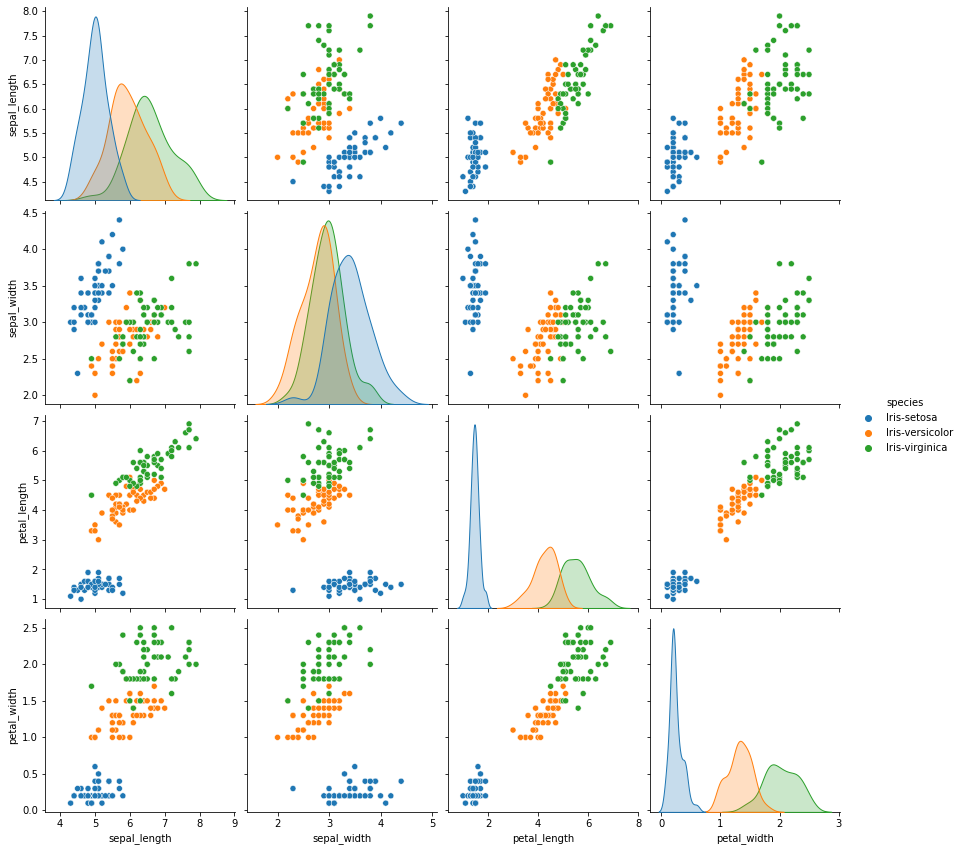

In [4]:
sns.pairplot(df,hue="species",height=3);
plt.show()

In [5]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### SVM

In [6]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = np.array(df[['species']]).reshape(-1,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

###### kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

In [19]:
svcl = SVC().fit(X_train,y_train) #kernel = 'rbf'
yhat = svcl.predict(X_test)
y_hat_test = pd.DataFrame({'yhat': yhat, 'y_test': y_test}, columns=['yhat','y_test'])
y_hat_test.head()

,yhat,y_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica


In [20]:
print(accuracy_score(y_test, yhat))

0.9666666666666667


In [44]:
svcl = SVC(kernel='linear').fit(X_train,y_train) 
yhat2 = svcl.predict(X_test)
print(accuracy_score(y_test, yhat2))

0.9666666666666667


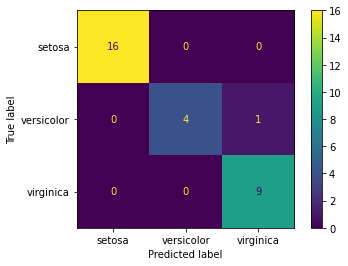

In [61]:
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(cm,display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot()
plt.show()